In [48]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# 1. FIR Filters

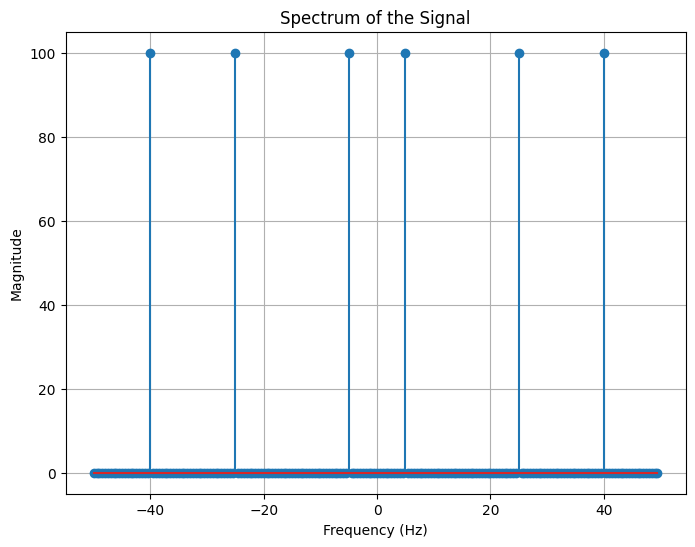

In [49]:
LCM = np.lcm.reduce([5, 25, 40])

# Create the signal of summed sine waves
fs = 100
length = LCM / fs
t = np.arange(0, length, 1/fs)
summed_sines = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 25 * t) + np.sin(2 * np.pi * 40 * t)

# Calculate the FFT spectrum
fft_signal = np.abs(np.fft.fft(summed_sines))
frequencies = np.fft.fftfreq(len(summed_sines), 1/fs)

# Plot the spectrum using plt.stem()
plt.figure(figsize=(8, 6))
plt.stem(frequencies, fft_signal)
plt.title('Spectrum of the Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

In [50]:
# Design filters
lowpass = signal.firwin(51, 19, fs=fs, pass_zero='lowpass', window='hamming')
bandpass = signal.firwin(51, [11, 31], fs=fs, pass_zero='bandpass', window='hamming')
bandstop = signal.firwin(51, [20, 30], fs=fs, pass_zero='bandstop', window='hamming')
highpass = signal.firwin(51, 10, fs=fs, pass_zero='highpass', window='hamming')

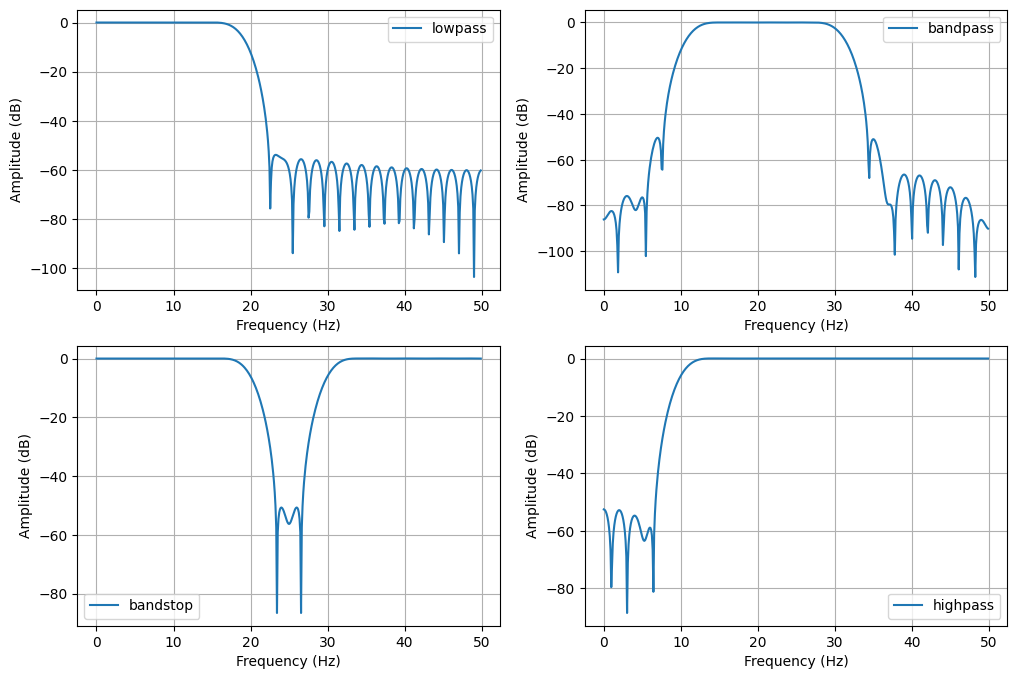

In [51]:
# Plot the frequency response of each filter
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
frequencies, response_lowpass = signal.freqz(lowpass, fs=fs)
plt.plot(frequencies, 20*np.log10(np.abs(response_lowpass)), label='lowpass')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.legend()
plt.grid()

plt.subplot(2, 2, 2)
frequencies, response_bandpass = signal.freqz(bandpass, fs=fs)
plt.plot(frequencies, 20*np.log10(np.abs(response_bandpass)), label='bandpass')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.legend()
plt.grid()

plt.subplot(2, 2, 3)
frequencies, response_bandstop = signal.freqz(bandstop, fs=fs)
plt.plot(frequencies, 20*np.log10(np.abs(response_bandstop)), label='bandstop')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.legend()
plt.grid()

plt.subplot(2, 2, 4)
frequencies, response_highpass = signal.freqz(highpass, fs=fs)
plt.plot(frequencies, 20*np.log10(np.abs(response_highpass)), label='highpass')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.legend()
plt.grid()
plt.show()

In [52]:
# Apply the filters using signal.lfilter and signal.filtfilt
filtered_lowpass = signal.lfilter(lowpass, 1, summed_sines)
filtered_bandpass = signal.lfilter(bandpass, 1, summed_sines)
filtered_bandstop = signal.lfilter(bandstop, 1, summed_sines)
filtered_highpass = signal.lfilter(highpass, 1, summed_sines)

filtered_lowpass_bid = signal.filtfilt(lowpass, 1, summed_sines)
filtered_bandpass_bid = signal.filtfilt(bandpass, 1, summed_sines)
filtered_bandstop_bid = signal.filtfilt(bandstop, 1, summed_sines)
filtered_highpass_bid = signal.filtfilt(highpass, 1, summed_sines)

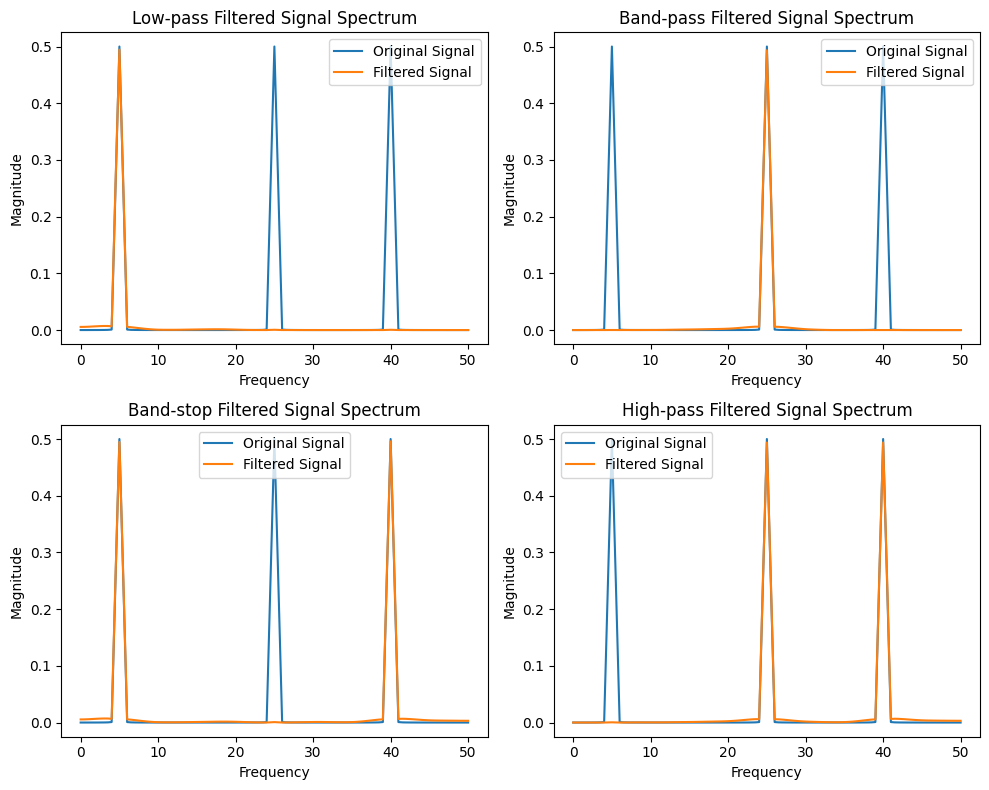

In [53]:
def plot_spectra(signal, filtered_signal, title, subplot_index):
    plt.subplot(2, 2, subplot_index)
    plt.magnitude_spectrum(summed_sines, Fs=fs, label='Original Signal')
    plt.magnitude_spectrum(filtered_signal, Fs=fs, label='Filtered Signal')
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    plt.legend()

# Assuming signal, filtered_lp, filtered_bp, filtered_bs, filtered_hp, and fs are defined

plt.figure(figsize=(10, 8))

plot_spectra(signal, filtered_lowpass, 'Low-pass Filtered Signal Spectrum', 1)
plot_spectra(signal, filtered_bandpass, 'Band-pass Filtered Signal Spectrum', 2)
plot_spectra(signal, filtered_bandstop, 'Band-stop Filtered Signal Spectrum', 3)
plot_spectra(signal, filtered_highpass, 'High-pass Filtered Signal Spectrum', 4)

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()

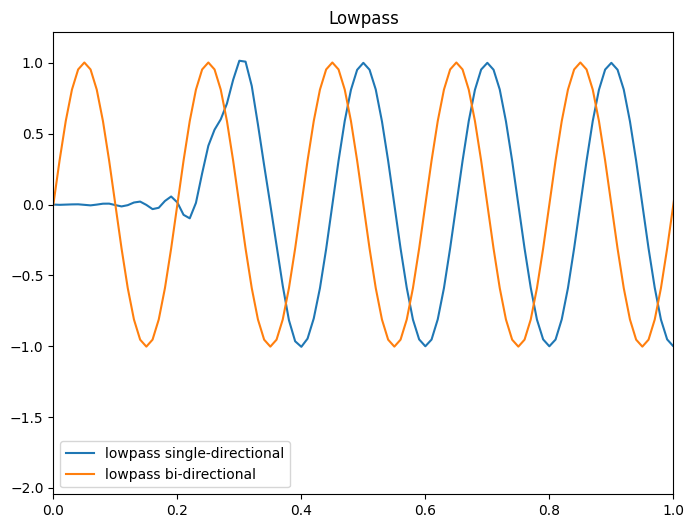

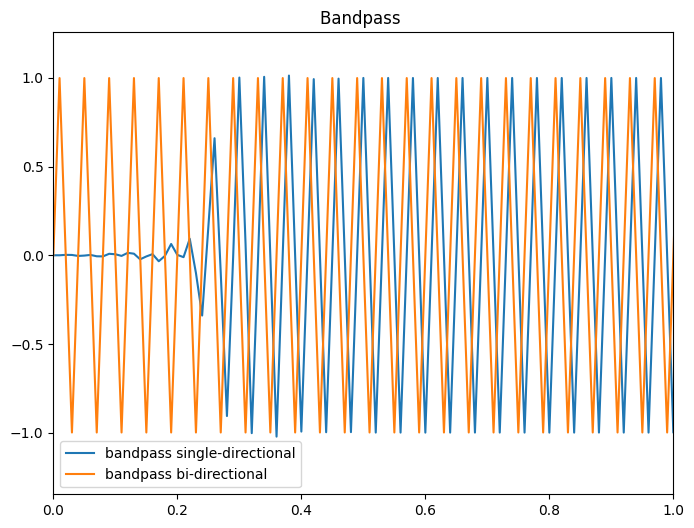

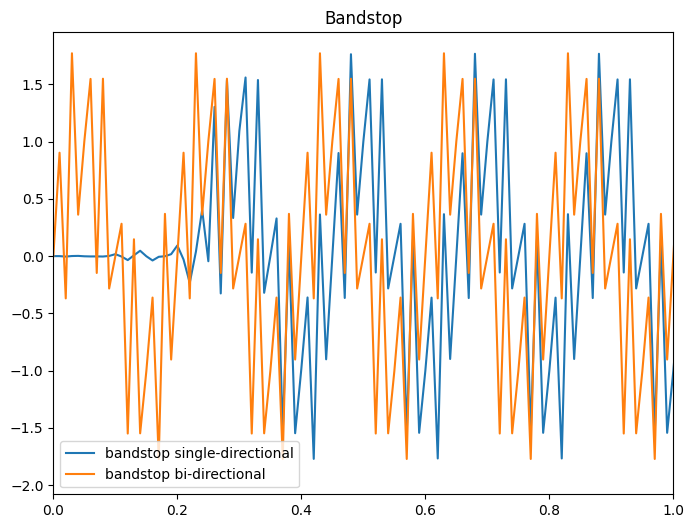

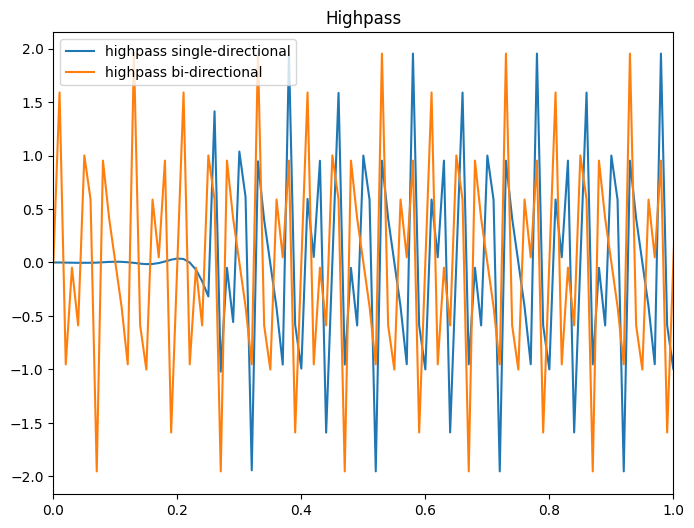

In [54]:
# Plot the filtered signals
plt.figure(figsize=(8, 6))
plt.plot(t, filtered_lowpass, label='lowpass single-directional')
plt.plot(t, filtered_lowpass_bid, label='lowpass bi-directional')
plt.title('Lowpass')
plt.xlim([0, 1])
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(t, filtered_bandpass, label='bandpass single-directional')
plt.plot(t, filtered_bandpass_bid, label='bandpass bi-directional')
plt.title('Bandpass ')
plt.legend()
plt.xlim([0, 1])
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(t, filtered_bandstop, label='bandstop single-directional')
plt.plot(t, filtered_bandstop_bid, label='bandstop bi-directional')
plt.title('Bandstop')
plt.legend()
plt.xlim([0, 1])
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(t, filtered_highpass, label='highpass single-directional')
plt.plot(t, filtered_highpass_bid, label='highpass bi-directional')
plt.title('Highpass')
plt.legend()
plt.xlim([0, 1])
plt.show()

In [55]:
amplitude_lp_ratio = np.max(filtered_lowpass) / np.max(summed_sines)
amplitude_bp_ratio = np.max(filtered_bandpass) / np.max(summed_sines)
amplitude_bs_ratio = np.max(filtered_bandstop) / np.max(summed_sines)
amplitude_hp_ratio = np.max(filtered_highpass) / np.max(summed_sines)

print(f"Amplitude ratio for Low-pass filter: {amplitude_lp_ratio}")
print(f"Amplitude ratio for Band-pass filter: {amplitude_bp_ratio}")
print(f"Amplitude ratio for Band-stop filter: {amplitude_bs_ratio}")
print(f"Amplitude ratio for High-pass filter: {amplitude_hp_ratio}")

Amplitude ratio for Low-pass filter: 0.5075831189770333
Amplitude ratio for Band-pass filter: 0.5065175315764975
Amplitude ratio for Band-stop filter: 0.8837164378296979
Amplitude ratio for High-pass filter: 0.9775113354578394
